In [2]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt
from skimage.util.shape import view_as_blocks, view_as_windows
from skimage.transform import resize
import numpy as np
%matplotlib inline

In [53]:
# blocks = view_as_blocks(x, block_shape=(224, 224, 3))

In [3]:
def _resize(x, blocksize=(224, 224)):
    block_width, block_height = blocksize
    width, height = x.shape[:2]
    if width % block_width != 0:
        new_width = block_width * (width // block_width + 1)
    else:
        new_width = block_width
    if height % block_height != 0:
        new_height = block_height * (height // block_height + 1)
    else:
        new_height = block_height
    return resize(x, (new_width, new_height))


def blockify(x, blocksize=(224, 224)):
    x = _resize(x, blocksize)
    return view_as_blocks(x, block_shape=blocksize + (3,))

In [10]:
x = imread('/tmp/nikshay.png')
x = rgba2rgb(x)
# X = blockify(x)

In [6]:
# model = load_model('vgg16-validated-five-classes.h5')
model = load_model('./models/four-class.h5')

In [5]:
labels = 'bar donut map multiline scatter'.split()

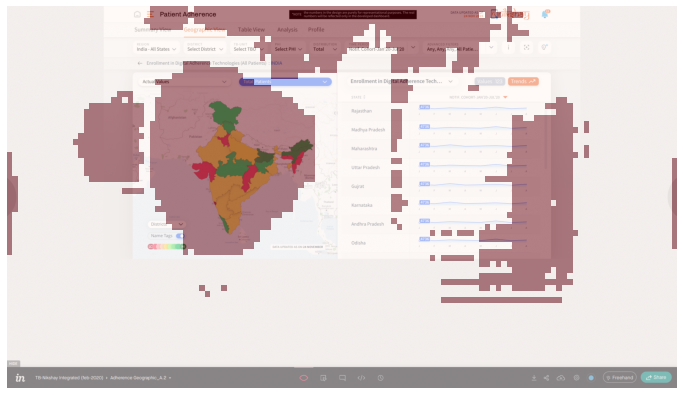

In [12]:
windows = view_as_windows(x, (224, 224, 3), step=14)
block_height, block_width = windows.shape[:2]
xTest = np.zeros((block_height * block_width, 224, 224, 3))
for i in range(block_height):
    for j in range(block_width):
        ix = i * block_width + j
        xTest[ix] = windows[i, j, 0]
winPred = tf.nn.softmax(model.predict(xTest, batch_size=32), axis=1)
probMax = tf.reduce_max(winPred, axis=1).numpy().reshape(block_height, block_width)

fig, ax = plt.subplots(figsize=(12, 16))
ax.imshow(x, extent = [0, x.shape[1], 0, x.shape[0]])
ax.imshow(probMax > 0.8, alpha=0.5, cmap=plt.cm.Reds, extent = [0, x.shape[1], 0, x.shape[0]])
ax.set_axis_off()